### Notebook for different types of Spatial Manipulation such as funtions, for loops, lists, and dictionaries.

Libraries

In [69]:
# Importing all of the necessary packages to read and display non-spatial data and spatial data
import pandas as pd
import geopandas as gpd

Data

In [70]:
# Reading in the Former Municipality Boundaries Data file and reprojecting (geometry will be in metres)
fmbd_old = gpd.read_file('data/Former Municipality Boundaries Data.geojson')
fmbd = fmbd_old.to_crs("EPSG:26917")
# Reading in the Community Shelters file and reprojecting (geometry will be in metres)
shelters_old = gpd.read_file("data/shelters.geojson")
shelters = shelters_old.to_crs("EPSG:26917")
# Reading in the Waste Transfer Station file and reprojecting (geometry will be in metres)
waste_old = gpd.read_file("data/waste.geojson")
waste = waste_old.to_crs("EPSG:26917")
# Reading in the City Wards Data file and reprojecting (geometry will be in metres)
cwd_old = gpd.read_file("data/City Wards Data.geojson")
cwd = cwd_old.to_crs("EPSG:26917")

Functions

In [71]:
def buffer_sjoin(gdf1, gdf2, dist = 1000):
    """Buffers geodataframe 1 and joins it to the nearest geometries in geodataframe 2.
    
    Parameters
    ----------
    gdf1 : geopandas.GeoDataFrame
        A geodataframe with points.
    gdf2 : geopandas.GeoDataFrame
        A geodataframe with polygons.
    dist : int or float
        Buffer distance to apply. Default is 1000.
    
    Returns
    -------
    geopandas.GeoDataFrame
        The geodataframe after applying a buffer to gdf1 and joining to geometries of gdf2.
    """
    # Buffer gdf1 by dist
    gdf1_buff = gdf1.buffer(dist)

    # Convert the GeoSeries to a GeoDataFrame
    gdf1_buff = gpd.GeoDataFrame(geometry=gdf1_buff, crs=gdf1.crs)

    # Join the geometries of gdf2 with buffered gdf1
    out = gdf1_buff.sjoin(gdf2)
    return(out)

In [72]:
def sjoin_count(gdf1, gdf2):
    """Joins geodataframe 1 and joins it to the nearest geometries in geodataframe 2. 
    Then counts columns from geodataframe 1.
    
    Parameters
    ----------
    gdf1 : geopandas.GeoDataFrame
        A geodataframe with points.
    gdf2 : geopandas.GeoDataFrame
        A geodataframe with points.
    
    Returns
    -------
    geopandas.GeoDataFrame
        The geodataframe after joining gdf1 and gdf2 and counting the columns from gdf2.
    """

    # Join the geometries of gdf1 with gdf2
    sjoin_gdf1_gdf2 = gdf1.sjoin(gdf2)

    # Count how many columns are from gdf1
    out = sjoin_gdf1_gdf2.filter(gdf1.columns).shape[1]

    return(out)

Functions Demo

<Axes: >

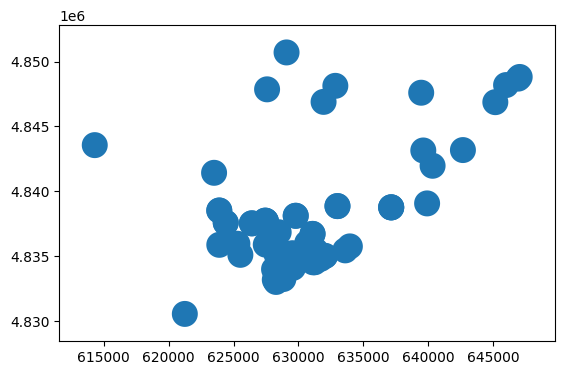

In [73]:
# Join shelters and fmbd together after buffering shelters
# Note the default distance is 1000, but it can be changed
# e.g. buffer_sjoin(shelters, fmbd, dist = 100) for a 100 meter buffer
buffer_sjoin_shelters_fmbd = buffer_sjoin(shelters, fmbd)
# Plotting the results of buffer_sjoin
buffer_sjoin_shelters_fmbd.plot()

In [74]:
# Counting columns from shelters after joining it to waste
sjoin_count_shelters_waste = sjoin_count(shelters, waste)
# Displays results from sjoin_count function
sjoin_count_shelters_waste

18

Data Structures

In [75]:
# Creating list with the Former Municipalities Boundary Data and City Wards Data geodataframes
gdf_list = [fmbd, cwd]
# Creating dictionary with the shelters and waste geodataframes
gdf_dict = {'Shelter locations': shelters, 'Waste Transfer Station': waste}

<Axes: >

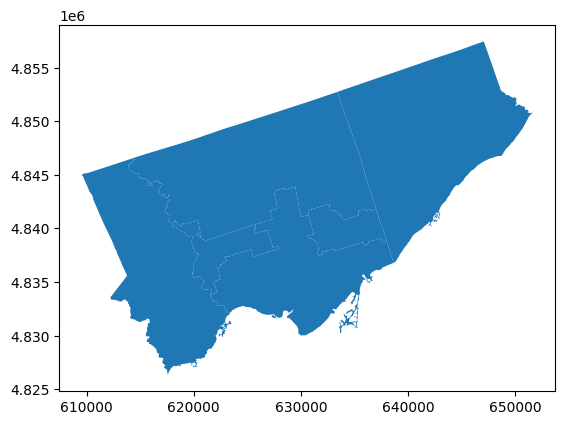

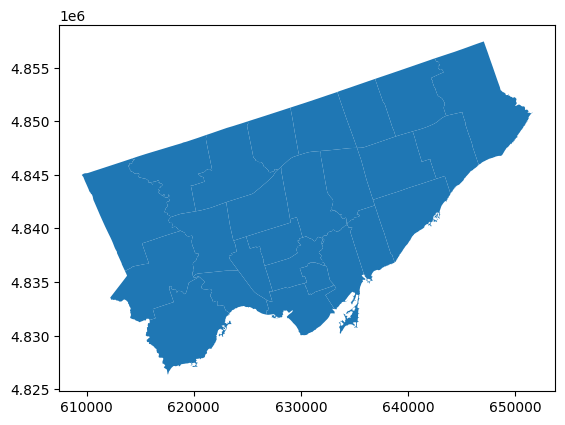

In [76]:
# Plotting the Former Municipalities Boundary Data geodataframe from list
FMBD = gdf_list[0]
FMBD.plot()
# Plotting the City Wards Data geodataframe from list
CWD = gdf_list[1]
CWD.plot()

<Axes: >

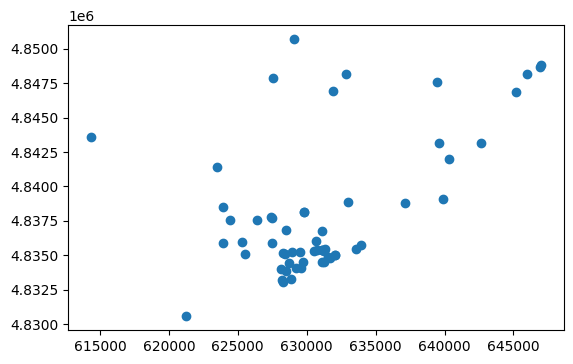

In [77]:
# Plotting the Shelters geodataframe from dictionary
Shelter_locations = gdf_dict['Shelter locations']
Shelter_locations.plot()

<Axes: >

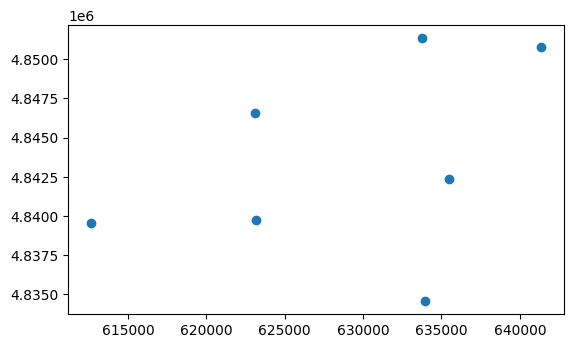

In [78]:
# Plotting the Waste geodataframe from dictionary
Waste_locations = gdf_dict['Waste Transfer Station']
Waste_locations.plot()

For Loops

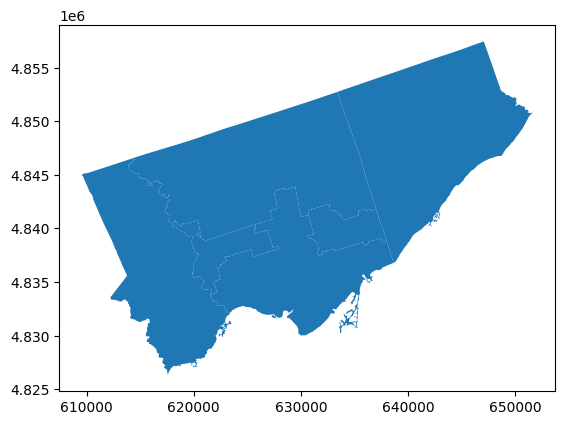

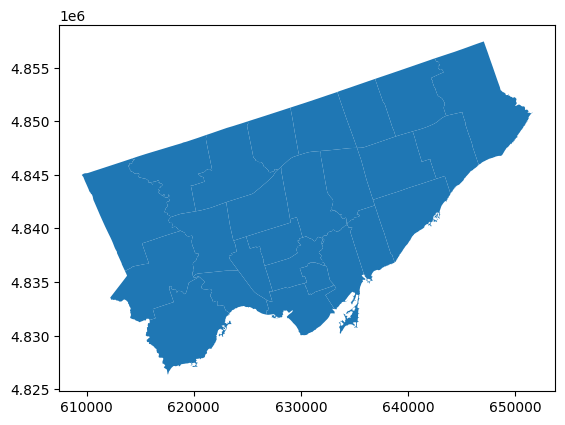

In [79]:
# Using a For Loop for every geodataframe in the list
for list in gdf_list:
    # Plotting every geodataframe in the list 
    list.plot()

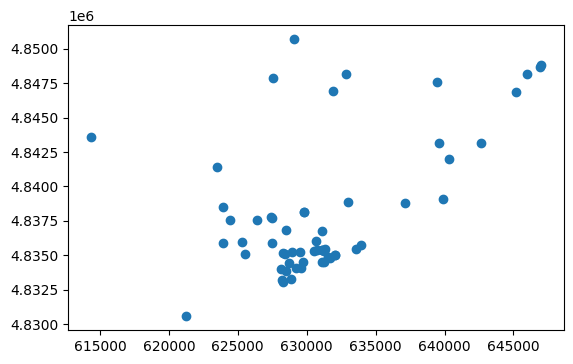

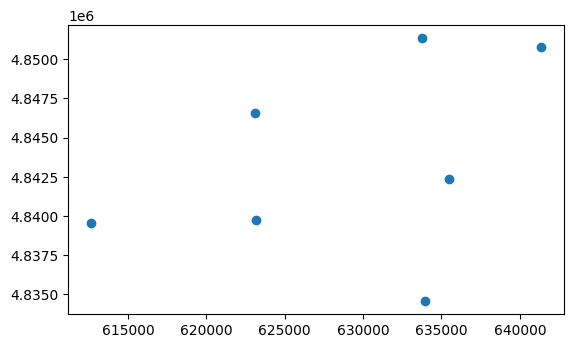

In [80]:
# Using a For Loop for every geodataframe in the dictionary
for dict in gdf_dict.values():
    # Plotting every geodataframe in the dictionary
    dict.plot()

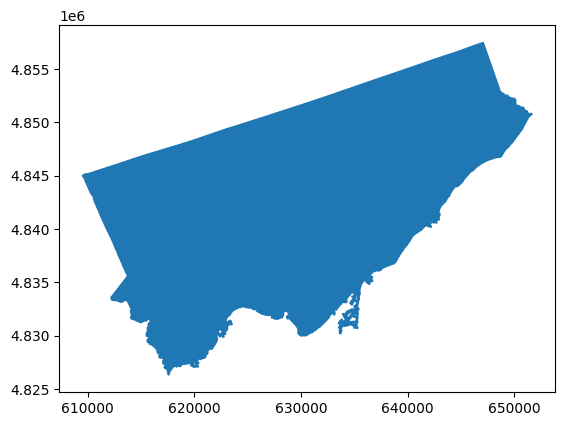

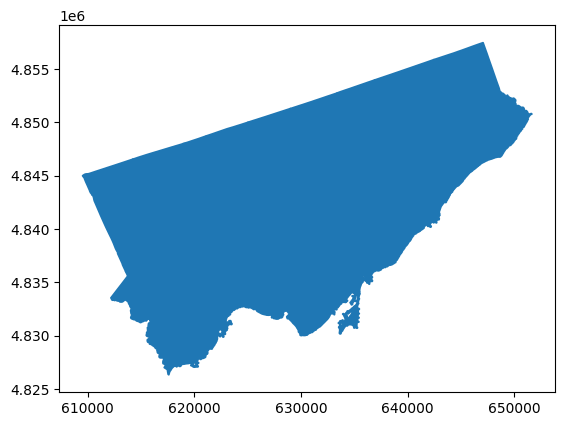

In [81]:
# Using a For Loop for every geodataframe in the list
for list in gdf_list:
    # Creating a 100 metre buffer and plotting every geodataframe in the list 
    list_buffers = list.buffer(100).plot()

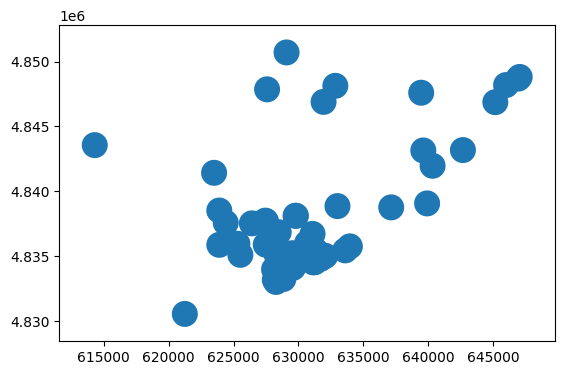

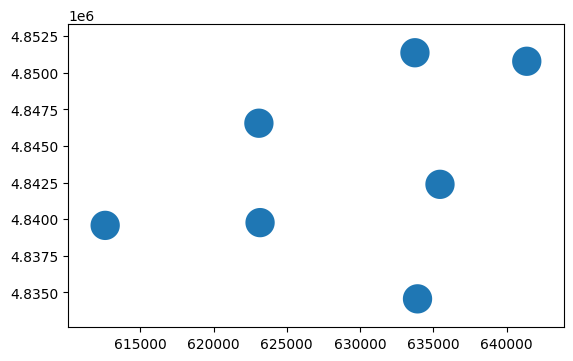

In [82]:
# Using a For Loop for every geodataframe in the dictionary
for dict in gdf_dict.values():
    # Creating a 1000 metre buffer for every geodataframe in the dictionary
    dict_buffers = dict.buffer(1000)
    # Display a spatial plot for the buffers applied to each dictionary item
    dict_buffers.plot()
    # Saves the buffer geodataframe to the buffers folder
    dict_buffers.to_file('data/buffers/dict_buffers.geojson', driver='GeoJSON')